In [1]:
import liana 
import anndata
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import anndata
import scanpy as sc
from liana.mt import rank_aggregate
from liana.mt import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

# Data PreProcessing

## Dataset 1 - Compare Hippo pathway coverage in *Drosophila* embryo dataset from GraphComm compared to other CCC methods (Fig2D)

### load dataset

In [3]:
#matrix = pd.read_csv("../data/GSE95025/GSM2494785_dge_mel_rep3.txt",sep="\t")
matrix_list = []
common_genes = []
for i,j in zip(range(3,8),range(5,10)):
    matrix_list.append(pd.read_csv(f"/data/raw_data/Drosophila/GSM249478{j}_dge_mel_rep{i}.txt",sep="\t",index_col=0))
    if not common_genes:
        common_genes = pd.read_csv(f"/data/raw_data/Drosophila/GSM249478{j}_dge_mel_rep{i}.txt",sep="\t",index_col=0).index.tolist()
    else:
        common_genes = list(set(common_genes) & set(pd.read_csv(f"/data/raw_data/Drosophila/GSM249478{j}_dge_mel_rep{i}.txt",sep="\t",index_col=0).index.tolist()))
        #matrix_list = [i.loc[common_genes] for i in matrix_list]
matrix = pd.concat(matrix_list)
matrix = matrix.loc[common_genes]
matrix = matrix[~matrix.index.duplicated(keep='first')]
matrix.index = [str(i).upper() for i in matrix.index.tolist()]
matrix = matrix[~matrix.index.duplicated(keep='first')]
matrix = matrix.fillna(0)
matrix = matrix.loc[:, (matrix != 0).any(axis=0)]


In [4]:
adata = anndata.AnnData(matrix.transpose())
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})
adata.obs = meta
adata.raw = adata
adata.obs["label"] = adata.obs["label"].astype("category")

/tmp/ipykernel_355/2399961009.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


### run CCC methods Conncetome, CellPhoneDB and CellChat. extract the results

In [8]:
connectome(adata,groupby="label")
drosophila_connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)

In [9]:
cellphonedb(adata,groupby="label")
drosophila_cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)

In [10]:
cellchat(adata,groupby="label")
drosophila_cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

# Dataset 2: Pre and Post Drug Treatment Dataset

In [ ]:
#matrix = pd.read_csv("../data/GSE95025/GSM2494785_dge_mel_rep3.txt",sep="\t")
matrix = pd.read_csv("/data/raw_data/Pre_Post/GSE150949/pc9_t0.csv",index_col=0)

matrix.index = [str(i).upper() for i in matrix.index.tolist()]

from scipy.stats import wilcoxon
import anndata
import scanpy as sc

index = matrix.index.tolist()

matrix = matrix.fillna(0)

adata = anndata.AnnData(matrix.transpose())

#meta = pd.read_csv("../data/Pre_Post/GSE150949_metaData_with_lineage.txt",sep="\t")

sc.pp.normalize_total(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

meta.index = meta["cell"].tolist()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')

/tmp/ipykernel_189/2495707260.py:14: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_189/2495707260.py:26: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


In [ ]:
connectome(adata,groupby="label",expr_prop=0)
connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)

In [ ]:
cellphonedb(adata,groupby="label")
cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)

In [ ]:
cellchat(adata,groupby="label")
cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

In [ ]:
day0_list = [connectome_df,cellphone_df,cellchat_df]

In [ ]:
#matrix = pd.read_csv("../data/GSE95025/GSM2494785_dge_mel_rep3.txt",sep="\t")
matrix = pd.read_csv("/data/raw_data/Pre_Post/GSE150949/pc9_t7_rep1.csv",index_col=0)

matrix.index = [str(i).upper() for i in matrix.index.tolist()]

from scipy.stats import wilcoxon
import anndata
import scanpy as sc

index = matrix.index.tolist()

matrix = matrix.fillna(0)

adata = anndata.AnnData(matrix.transpose())

#meta = pd.read_csv("../data/Pre_Post/GSE150949_metaData_with_lineage.txt",sep="\t")

sc.pp.normalize_total(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

meta.index = meta["cell"].tolist()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')

/tmp/ipykernel_189/2781942719.py:14: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_189/2781942719.py:26: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/opt/conda/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1


In [ ]:
connectome(adata,groupby="label",expr_prop=0)
connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)

In [ ]:
cellphonedb(adata,groupby="label")
cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)

In [ ]:
cellchat(adata,groupby="label")
cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

In [ ]:
day7_rep1_list = [connectome_df,cellphone_df,cellchat_df]

In [ ]:
#matrix = pd.read_csv("../data/GSE95025/GSM2494785_dge_mel_rep3.txt",sep="\t")
matrix = pd.read_csv("/data/raw_data/Pre_Post/GSE150949/pc9_t7_rep2.csv",index_col=0)

matrix.index = [str(i).upper() for i in matrix.index.tolist()]

from scipy.stats import wilcoxon
import anndata
import scanpy as sc

index = matrix.index.tolist()

matrix = matrix.fillna(0)

adata = anndata.AnnData(matrix.transpose())

#meta = pd.read_csv("../data/Pre_Post/GSE150949_metaData_with_lineage.txt",sep="\t")

sc.pp.normalize_total(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

meta = pd.DataFrame({"cell":adata.obs["leiden"].index.tolist(),"label":adata.obs["leiden"].tolist()})

meta.index = meta["cell"].tolist()

adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')
pval_df = pd.DataFrame.from_records(adata.uns["rank_genes_groups"]["pvals"])
pval_df.index = matrix.index.tolist()
cell_type_df = {}
for i in pval_df.columns.tolist():
    sub = pval_df[i]
    sub = sub[sub < 0.05]
    cell_type_df[i] = sub.index.tolist()

         Falling back to preprocessing with `sc.pp.pca` and default params.


/tmp/ipykernel_189/2809233977.py:14: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/tmp/ipykernel_189/2809233977.py:26: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


/opt/conda/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1


In [ ]:
connectome(adata,groupby="label",expr_prop=0)
connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)

In [ ]:
cellphonedb(adata,groupby="label")
cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)

In [ ]:
cellchat(adata,groupby="label")
cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

In [ ]:
#day7_rep2_list = [connectome_df,cellphone_df,cellchat_df]
day7_rep2_list = [connectome_df,cellphone_df,cellchat_df]

## Dataset 2 - Spatial cardiovascular data (Fig 2E)

In [97]:
adata = sc.read_h5ad("/data/raw_data/Cardiac_cells//Visium-FZ_GT_P19.h5ad")
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
matrix = pd.DataFrame.sparse.from_spmatrix(adata.X,index=adata.obs.index.tolist(),columns=adata.var["feature_name"].tolist())

meta = pd.DataFrame({"cell":adata.obs.index.tolist(),"label":adata.obs["cell_type_original"].tolist()})
meta = meta[meta["label"] != "Lymphoid"]
meta.index = meta["cell"].tolist()

matrix = matrix.transpose()

matrix = matrix[meta.index.tolist()]

from scipy.stats import wilcoxon
import anndata
import scanpy as sc

index = matrix.index.tolist()

meta['label'] = meta["label"].astype("string").tolist()

meta["cell"] = meta["cell"].astype("category")
meta["label"] = meta["label"].astype("category")

matrix = matrix.loc[:,~matrix.columns.duplicated()].copy()
meta = meta.loc[~meta.index.duplicated(),:].copy()




adata = anndata.AnnData(matrix.transpose())
adata.raw = adata
adata.obs = meta
adata.obs["label"] = adata.obs["label"].astype("category")
sc.tl.rank_genes_groups(adata, 'label')

In [98]:
connectome(adata,groupby="label",expr_prop=0)
spatial_connectome_df = adata.uns["liana_res"][["source","target","ligand","receptor","expr_prod"]].sort_values("expr_prod",ascending=False)

In [99]:
cellphonedb(adata,groupby="label")
spatial_cellphone_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_means"]].sort_values("lr_means",ascending=False)

In [100]:
cellchat(adata,groupby="label")
spatial_cellchat_df = adata.uns["liana_res"][["source","target","ligand","receptor","lr_probs"]].sort_values("lr_probs",ascending=False)

# Gathering LIANA benchmarking Results

## Dataset 1: *Drosophila* embryo (Fig 2D)

for each dataset, get the pathway coverage for Hippo pathway genes

In [ ]:
inputs = [drosophila_connectome_df[["ligand","receptor","expr_prod"]],drosophila_cellchat_df[["ligand","receptor","lr_probs"]],drosophila_cellphone_df[["ligand","receptor","lr_means"]]]

In [ ]:
for i in inputs:
    i.columns = ["Ligand","Receptor","Prob"]

In [52]:
pathways = pd.read_csv("/data/LR_database/kegg_pathways.csv",index_col=0)
pathways.index = pathways["genesymbol"].tolist()
pathways = pathways.drop_duplicates("genesymbol")

In [53]:
hippo_genes = pathways[(pathways["pathway"].str.contains("Hippo"))]["genesymbol"].tolist()

In [54]:
available_hippo_genes = list(set(matrix.index.tolist()) & set(hippo_genes))

In [55]:
inputs = [i.head(1000) for i in inputs]

In [56]:
benchmarking_list = []
for input_data in inputs:
    input_data = input_data[(input_data["Ligand"].isin(pathways["genesymbol"].tolist())) | (input_data["Receptor"].isin(pathways["genesymbol"].tolist()))]
    involved_ligands = list(set(input_data["Ligand"].tolist()) & set(pathways["genesymbol"].tolist()))
    involved_receptors = list(set(input_data["Receptor"].tolist()) & set(pathways["genesymbol"].tolist()))
    input_data["Ligand Pathway"] = [pathways.loc[i]["pathway"] if i in pathways["genesymbol"].tolist() else "" for i in input_data["Ligand"].tolist()]
    input_data["Receptor Pathway"] = [pathways.loc[i]["pathway"] if i in pathways["genesymbol"].tolist() else "" for i in input_data["Receptor"].tolist()]
    signaling_pathway = input_data[input_data["Ligand"].isin(hippo_genes) | input_data["Receptor"].isin(hippo_genes)]
    sizes_list = [] 
    for i in range(0,1000,100):
        temp = signaling_pathway.head(i)
        found_genes = temp["Ligand"].tolist() + temp["Receptor"].tolist()
        found_hippo_genes = list(set(found_genes) & set(hippo_genes))
        sizes_list.append(len(found_hippo_genes) / len(available_hippo_genes)) 
    benchmarking_list.append(sizes_list)
                                  

import GraphComm result coverage

In [57]:
graphcomm_data = pd.read_csv("/data/GraphComm_Output/Drosophila/CCI.csv",index_col=0)

In [58]:
graphcomm_data = graphcomm_data[(graphcomm_data["Src"].isin(pathways["genesymbol"].tolist())) & (graphcomm_data["Dst"].isin(pathways["genesymbol"].tolist()))]

In [59]:
graphcomm_data.columns = ["Ligand","Receptor","Prob"]

In [60]:
graphcomm_inputs = [graphcomm_data.head(1000)]

In [61]:
graphcomm_data = graphcomm_data.head(1000)

In [62]:
graphcomm_list = []
for i in range(0,1000,100):
    temp = graphcomm_data.head(i)
    found_genes = temp["Ligand"].tolist() + temp["Receptor"].tolist()
    found_hippo_genes = list(set(found_genes) & set(hippo_genes))
    graphcomm_list.append(len(found_hippo_genes) / len(available_hippo_genes))
                                  

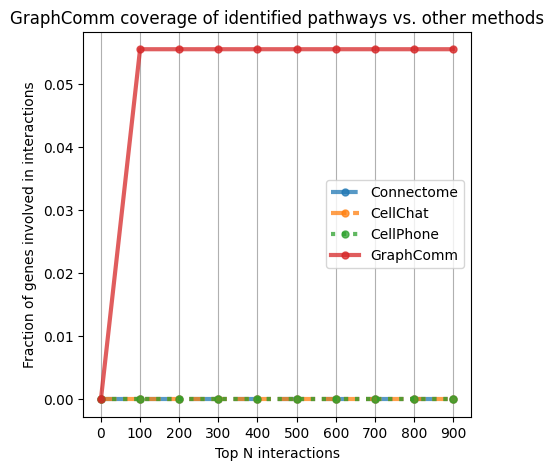

In [63]:
%matplotlib inline
plt.figure(figsize=(5,5))
line_styles = ["-.",'--',":"]*4
methods_list = ["Connectome","CellChat","CellPhone"]
for i in range(len(benchmarking_list)):
    plt.plot(range(0,1000,100),benchmarking_list[i],markersize=5,marker="o",linestyle=line_styles[i],label=methods_list[i],linewidth=3,alpha=0.75)
plt.plot(range(0,1000,100),graphcomm_list,markersize=5,marker="o",label="GraphComm",linewidth=3,alpha=0.75)

plt.xticks(range(0,1000,100))
plt.grid(axis = 'x')
plt.title("GraphComm coverage of identified pathways vs. other methods")
plt.xlabel("Top N interactions")
plt.ylabel("Fraction of genes involved in interactions")
plt.legend()

# Dataset 2: Pre and Post Treatment Dataset (Fig 3E)

### get unique ligand receptor interactions

In [125]:
day0_list = [i[["ligand","receptor"]].drop_duplicates() for i in day0_list]
day7_rep1_list = [i[["ligand","receptor"]].drop_duplicates() for i in day7_rep1_list]
day7_rep2_list = [i[["ligand","receptor"]].drop_duplicates() for i in day7_rep2_list]

In [126]:
original_day0 = day0_list
original_day7_rep1 = day7_rep1_list
original_day7_rep2 = day7_rep2_list


### for each method's result of each dataset, retrieve the top 1000 interactions

In [159]:
day0_list = [i.head(100) for i in day0_list]
day7_rep1_list = [i.head(100) for i in day7_rep1_list]
day7_rep2_list = [i.head(100) for i in day7_rep2_list]


### for each method's result of each dataset, only retain intercell validated interactions

In [160]:
Omnipath_db = pd.read_csv("/data/LR_database/intercell_Omnipath.csv",index_col=0)[["source","target"]].drop_duplicates()

In [161]:
Omnipath_db.columns = ["from","to"]

In [162]:
day0_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day0_list]
day7_rep1_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day7_rep1_list]
day7_rep2_list = [pd.merge(i,Omnipath_db,left_on=["ligand","receptor"],right_on=["from","to"]) for i in day7_rep2_list]

In [163]:
day0_list = [i[["ligand","receptor"]] for i in day0_list]
day7_rep1_list = [i[["ligand","receptor"]] for i in day7_rep1_list]
day7_rep2_list = [i[["ligand","receptor"]] for i in day7_rep2_list]

### for each method, capture maximum # of unique interactions between top 100 CCC interactions between pre and post treatment datasets

In [170]:
pre_post_list = []
for i,j,k in zip(day0_list,day7_rep1_list,day7_rep2_list):
    day0_day7_rep1_common = pd.merge(i,j).shape[0]/100
    day0_day7_rep2_common = pd.merge(i,k).shape[0]/100
    pre_post_list.append(max(1-day0_day7_rep1_common,1-day0_day7_rep2_common))

### import GraphComm's results, perform same preprocessing

In [172]:
input_day7_1 = pd.read_csv("/results/GraphComm_Output/Pre_Post/Day0/CCI.csv")[["Src","Dst"]]
input_day7_2 = pd.read_csv("/results/GraphComm_Output/Pre_Post/Day7_1/CCI.csv")[["Src","Dst"]]
input_day0 = pd.read_csv("/results/GraphComm_Output/Pre_Post/Day7_2/CCI.csv")[["Src","Dst"]]

In [175]:
Omnipath_db = Omnipath_db.drop_duplicates()
input_day0 = pd.merge(input_day0,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(100)[["Src","Dst"]]
input_day7_1 = pd.merge(input_day7_1,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(100)[["Src","Dst"]]
input_day7_2 = pd.merge(input_day7_2,Omnipath_db,left_on=["Src","Dst"],right_on=["from","to"]).head(100)[["Src","Dst"]]

In [176]:
input_day0_day7_1 = pd.merge(input_day0,input_day7_1).shape[0]/100
input_day0_day7_2 = pd.merge(input_day0,input_day7_2).shape[0]/100

In [179]:
graphcomm_pre_post = max(1-input_day0_day7_1,1-input_day0_day7_2)

Text(0, 0.5, 'Fraction of Unique Interactions')

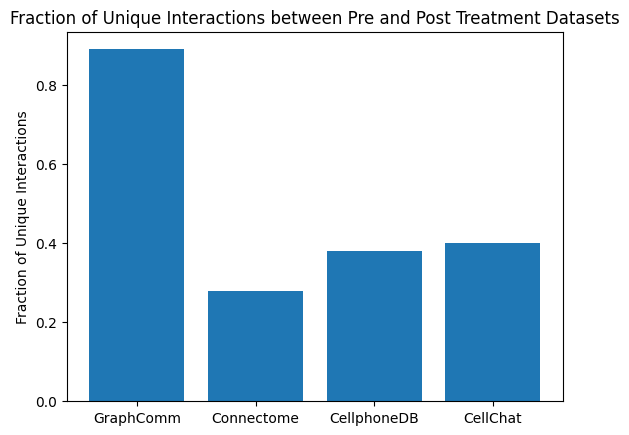

In [183]:
%matplotlib inline
plt.bar(["GraphComm","Connectome","CellphoneDB","CellChat"],[graphcomm_pre_post] + pre_post_list)
plt.title("Fraction of Unique Interactions between Pre and Post Treatment Datasets")
plt.ylabel("Fraction of Unique Interactions")

# Analyzing spatial data (Fig 4E)

### remove self-loops for cell groups

In [101]:
spatial_cellphone_df = spatial_cellphone_df[spatial_cellphone_df["source"] != spatial_cellphone_df["target"]]
spatial_cellchat_df = spatial_cellchat_df[spatial_cellchat_df["source"] != spatial_cellchat_df["target"]]
spatial_connectome_df = spatial_connectome_df[spatial_connectome_df["source"] != spatial_connectome_df["target"]]


### for each method's results, capture the top 10 unique cell group interactions

In [102]:
temp_cellphone_df = spatial_cellphone_df.drop_duplicates(["source","target"]).head(10)
temp_cellchat_df = spatial_cellchat_df.drop_duplicates(["source","target"]).head(10)
temp_connectome_df = spatial_connectome_df.drop_duplicates(["source","target"]).head(10)

### import GraphComm results, remove self loops and capture the top 10 unique cell group interactions

In [103]:
input_data = pd.read_csv("/results/GraphComm_Output/Cardiac_cells/CCI.csv",index_col=0)

In [104]:
#input_data = pd.merge(input_data,intercell_network,left_on=["Src","Dst"],right_on=["from","to"])

In [105]:
input_data = input_data[input_data["Src Cell"] != input_data["Dst Cell"]]

In [118]:
input_data = input_data.drop_duplicates(["Src Cell","Dst Cell"]).head(10)

### retrieve cell group spatial coordinates

In [106]:
adata = sc.read_h5ad("/data/raw_data/Cardiac_cells/Visium-FZ_GT_P19.h5ad")


In [107]:
meta = pd.DataFrame({"cell":adata.obs.index.tolist(),"label":adata.obs["cell_type_original"].tolist()})
meta = meta[meta["label"] != "Lymphoid"]
meta.index = meta["cell"].tolist()

In [108]:
adata = adata[meta.index.tolist()]
spatial_coordinates = adata.obsm["X_spatial"]


In [109]:
spatial_df = pd.DataFrame({"x":spatial_coordinates[:,0],"y":spatial_coordinates[:,1]},index=meta.index.tolist())

In [110]:
cell_groups = meta["label"].unique().tolist()

In [111]:
import math
import numpy as np

### extract from each method, the average eucleadian distance for the top 10 cell group interactions

In [112]:
cellphone_spatial = []
for one,two in zip(temp_cellphone_df["source"].tolist(),temp_cellphone_df["target"].tolist()):
    cells = meta[meta["label"]==one].index.tolist()
    spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
    #if two != one:
    second_cells = meta[meta["label"]==two].index.tolist()
    second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
    min_list = []
    for k in spatial_coords:
        min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
    cellphone_spatial.append(np.mean(min_list))


In [113]:
cellchat_spatial = []
for one,two in zip(temp_cellchat_df["source"].tolist(),temp_cellchat_df["target"].tolist()):
    cells = meta[meta["label"]==one].index.tolist()
    spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
    #if two != one:
    second_cells = meta[meta["label"]==two].index.tolist()
    second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
    min_list = []
    for k in spatial_coords:
        min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
    cellchat_spatial.append(np.mean(min_list))


In [114]:
connectome_spatial = []
for one,two in zip(temp_connectome_df["source"].tolist(),temp_connectome_df["target"].tolist()):
    cells = meta[meta["label"]==one].index.tolist()
    spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
    #if two != one:
    second_cells = meta[meta["label"]==two].index.tolist()
    second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
    min_list = []
    for k in spatial_coords:
        min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
    connectome_spatial.append(np.mean(min_list))


In [119]:
graphcomm_spatial = []
for one,two in zip(input_data["Src Cell"].tolist(),input_data["Dst Cell"].tolist()):
    cells = meta[meta["label"]==one].index.tolist()
    spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
    #if two != one:
    second_cells = meta[meta["label"]==two].index.tolist()
    second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
    min_list = []
    for k in spatial_coords:
        min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
    graphcomm_spatial.append(np.mean(min_list))


### extract randomized iterations

In [46]:
df_list = []
for i in range(100):
    df_list.append(pd.read_csv(f"/data/random_data/Cardiac_cells/spatial_{i+1}_random.csv",index_col=0).drop_duplicates(["Src Cell","Dst Cell"]))

In [47]:
random_spatial = []
for i in df_list:
    temp_input = i
    input_spatial = []
    for one,two in zip(temp_input["Src Cell"].tolist(),temp_input["Dst Cell"].tolist()):
        cells = meta[meta["label"]==one].index.tolist()
        spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[cells]["x"].tolist(),spatial_df.loc[cells]["y"].tolist())]
        #if two != one:
        second_cells = meta[meta["label"]==two].index.tolist()
        second_spatial_coords = [(i,j) for i,j in zip(spatial_df.loc[second_cells]["x"].tolist(),spatial_df.loc[second_cells]["y"].tolist())]
        min_list = []
        for k in spatial_coords:
            min_list.append(np.mean([math.dist(k,l) for l in second_spatial_coords]))
        input_spatial.append(np.mean(min_list))
    random_spatial.append(input_spatial)


In [48]:
random_average = []
for i in range(10):
    random_average.append(np.mean([j[i] for j in random_spatial]))

In [49]:
from scipy.stats import wilcoxon

In [120]:
x = [connectome_spatial,cellchat_spatial,cellphone_spatial,random_average,graphcomm_spatial]
#x = [connectome_spatial,cellchat_spatial,cellphone_spatial,graphcomm_spatial]
comparison_labels = ['Connectome',"CellChat","CellPhone","Random","GraphComm"]
df = pd.DataFrame(x, index=comparison_labels)


### visualize via ridgeline plot

In [122]:
import seaborn as sns

In [123]:
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']


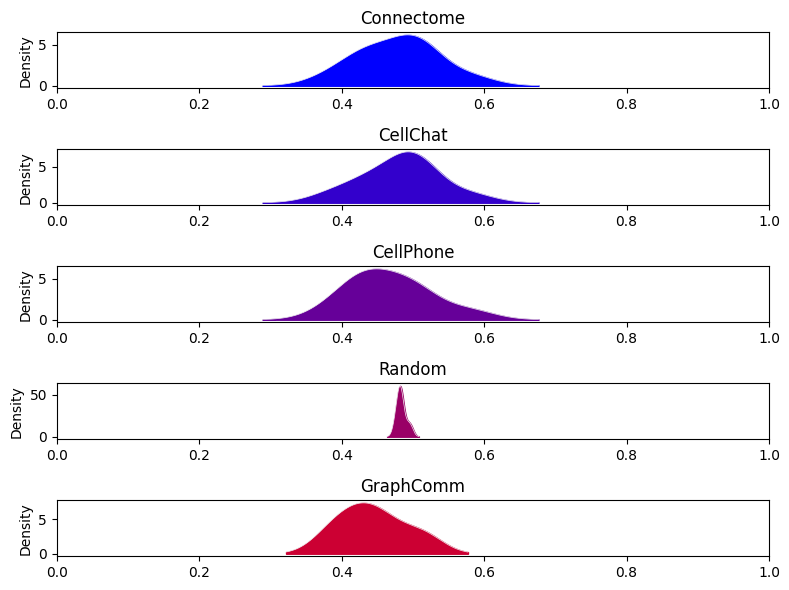

In [124]:
import matplotlib.gridspec as grid_spec
%matplotlib inline
gs = (grid_spec.GridSpec(len(comparison_labels),1))

fig = plt.figure(figsize=(8,6))

i = 0

#creating empty list
ax_objs = []

for label in comparison_labels:
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    plot = (df.loc[label].plot.kde(ax=ax_objs[-1],color="#f0f0f0", lw=0.5)
           )

    # grabbing x and y data from the kde plot
    x = plot.get_children()[0]._x
    y = plot.get_children()[0]._y

    # filling the space beneath the distribution
    ax_objs[-1].fill_between(x,y,color=colors[i])

    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0,1)
    #ax_objs[-1].set_ylim(0,10)
    ax_objs[-1].set_title(label)
    i += 1

plt.tight_layout()
plt.show()